# **Title: Regularization Techniques in Deep Learning**

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


# **Objective**

The objective of this notebook is to:

1. Understand the concept of regularization and its importance in preventing overfitting.

2. Learn the mathematical intuition behind L1/L2 regularization, Dropout, and Batch Normalization.

3. Implement these techniques in Keras and analyze their effects on model performance.

4. Visualize the impact of regularization using plots and interpret the results.

# **Notebook Contents**

1. Concept of Regularization

2. Mathematical Intuition

3. Code Implementation

4. L2 Regularization

5. Dropout

6. Batch Normalization

7. Advantages and Disadvantages

8. Plots and Interpretation

9. Conclusion

# **Concept of Regularization**

Regularization is a set of techniques used to prevent overfitting in deep learning models. Overfitting occurs when a model learns the training data too well, including its noise and outliers, which harms its performance on unseen data. Regularization techniques help the model generalize better.

**Common Regularization Techniques**
1. L1/L2 Regularization: Adds a penalty to the loss function based on the magnitude of the weights.

2. Dropout: Randomly drops neurons during training to prevent co-adaptation.

3. Batch Normalization: Normalizes the output of a layer to stabilize and speed up training.

# **2. Mathematical Intuition**

**L1 Regularization**

The L1 penalty is the sum of the absolute values of the weights:

L1 = lambda * sum(|w_i|)

where:

lambda is the regularization parameter.

w_i are the weights.

**L2 Regularization**

The L2 penalty is the sum of the squared values of the weights:

L2 = lambda * sum(w_i^2)

**Gradients for L1/L2**

L1 Gradient: d(L1)/d(w_i) = lambda * sign(w_i)

L2 Gradient: d(L2)/d(w_i) = 2 * lambda * w_i

**Dropout**

During training, dropout randomly sets a fraction (rate) of the neurons to zero. This prevents the model from relying too much on specific neurons.

**Batch Normalization**

BatchNorm normalizes the output of a layer by adjusting and scaling the activations:

normalized_output = (output - mean) / sqrt(variance + epsilon)

where epsilon is a small constant for numerical stability.

# **3. Code Implementation**

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# Create a model with L2 regularization
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(100,)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,274 (44.04 KB)

 Trainable params: 11,274 (44.04 KB)

 Non-trainable params: 0 (0.00 B)

## **Code Explanation**

### **Importing Necessary Libraries**
1. `from tensorflow.keras import Sequential`:  
   - Imports the `Sequential` class from TensorFlow's Keras API, used to build a linear stack of layers for a neural network.

2. `from tensorflow.keras.layers import Dense`:  
   - Imports the `Dense` layer, a fully connected neural network layer.

3. `from tensorflow.keras.regularizers import l2`:  
   - Imports the `l2` regularization function, which adds a penalty proportional to the square of the weights to the loss function to reduce overfitting.

---

### **Building the Sequential Model**
4. `model = Sequential([...])`:  
   - Initializes the `Sequential` model as a stack of layers.

5. `Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(100,))`:  
   - Adds the first dense (fully connected) layer with:
     - **64 neurons**
     - **ReLU activation function** for introducing non-linearity.
     - **L2 regularization** with a penalty factor of `0.01` to reduce overfitting.
     - **Input shape** of `(100,)`, indicating 100 features in the input.

6. `Dense(64, activation='relu', kernel_regularizer=l2(0.01))`:  
   - Adds a second dense layer with:
     - **64 neurons**
     - **ReLU activation function**
     - **L2 regularization** with the same penalty factor as the first layer.

7. `Dense(10, activation='softmax')`:  
   - Adds an output layer with:
     - **10 neurons**, corresponding to 10 classes in the classification task.
     - **Softmax activation function**, which converts the outputs to probabilities summing up to 1.

---

### **Compiling the Model**
8. `model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])`:  
   - Configures the model for training with:
     - **Adam optimizer**, an adaptive gradient-based optimization algorithm.
     - **Categorical cross-entropy loss**, used for multi-class classification tasks.
     - **Accuracy metric**, to evaluate the performance during training and validation.

---

### **Model Summary**
9. `model.summary()`:  
   - Prints a summary of the model architecture, including the number of layers, parameters, and output shapes.


# **Dropout in Keras**

In [4]:
from tensorflow.keras.layers import Dropout

# Create a model with Dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(100,)),
    Dropout(0.5),  # Dropout with 50% probability
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,274 (44.04 KB)

 Trainable params: 11,274 (44.04 KB)

 Non-trainable params: 0 (0.00 B)

## **Code Explanation**

### **Importing Necessary Libraries**
1. `from tensorflow.keras.layers import Dropout`:  
   - Imports the `Dropout` layer, which is used to randomly set a fraction of input units to 0 during training to prevent overfitting.

---

### **Building the Sequential Model**
2. `model = Sequential([...])`:  
   - Initializes the `Sequential` model as a stack of layers.

3. `Dense(64, activation='relu', input_shape=(100,))`:  
   - Adds the first dense (fully connected) layer with:
     - **64 neurons**
     - **ReLU activation function**
     - **Input shape** of `(100,)`, indicating 100 features in the input.

4. `Dropout(0.5)`:  
   - Adds a dropout layer with a **50% probability**, randomly dropping half of the input units to reduce overfitting.

5. `Dense(64, activation='relu')`:  
   - Adds a second dense layer with:
     - **64 neurons**
     - **ReLU activation function**.

6. `Dropout(0.5)`:  
   - Adds another dropout layer with the same **50% probability** as above.

7. `Dense(10, activation='softmax')`:  
   - Adds an output layer with:
     - **10 neurons**, corresponding to 10 classes in the classification task.
     - **Softmax activation function**, converting the outputs to probabilities summing to 1.

---

### **Compiling the Model**
8. `model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])`:  
   - Configures the model for training with:
     - **Adam optimizer**, an adaptive gradient-based optimization algorithm.
     - **Categorical cross-entropy loss**, used for multi-class classification tasks.
     - **Accuracy metric**, to evaluate performance during training and validation.

---

### **Model Summary**
9. `model.summary()`:  
   - Prints a summary of the model architecture, including:
     - The number of layers and their types.
     - The number of trainable parameters.
     - The output shapes for each layer.


# **Batch Normalization in Keras**

In [5]:
from tensorflow.keras.layers import BatchNormalization

# Create a model with Batch Normalization
model = Sequential([
    Dense(64, activation='relu', input_shape=(100,)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,786 (46.04 KB)

 Trainable params: 11,530 (45.04 KB)

 Non-trainable params: 256 (1.00 KB)

## **Code Explanation**

### **Importing Necessary Libraries**
1. `from tensorflow.keras.layers import BatchNormalization`:  
   - Imports the `BatchNormalization` layer, which normalizes the activations of the previous layer during training to improve convergence and stabilize learning.

---

### **Building the Sequential Model**
2. `model = Sequential([...])`:  
   - Initializes the `Sequential` model as a stack of layers.

3. `Dense(64, activation='relu', input_shape=(100,))`:  
   - Adds the first dense (fully connected) layer with:
     - **64 neurons**
     - **ReLU activation function**
     - **Input shape** of `(100,)`, indicating 100 features in the input.

4. `BatchNormalization()`:  
   - Adds a batch normalization layer that:
     - Normalizes the activations from the previous dense layer.
     - Maintains learnable parameters for mean and variance during training.

5. `Dense(64, activation='relu')`:  
   - Adds a second dense layer with:
     - **64 neurons**
     - **ReLU activation function**.

6. `BatchNormalization()`:  
   - Adds another batch normalization layer after the second dense layer to further stabilize and speed up learning.

7. `Dense(10, activation='softmax')`:  
   - Adds an output layer with:
     - **10 neurons**, corresponding to 10 classes in the classification task.
     - **Softmax activation function**, converting the outputs to probabilities summing to 1.

---

### **Compiling the Model**
8. `model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])`:  
   - Configures the model for training with:
     - **Adam optimizer**, an adaptive gradient-based optimization algorithm.
     - **Categorical cross-entropy loss**, used for multi-class classification tasks.
     - **Accuracy metric**, to evaluate performance during training and validation.

---

### **Model Summary**
9. `model.summary()`:  
   - Prints a summary of the model architecture, including:
     - The number of layers and their types.
     - The number of trainable parameters.
     - The output shapes for each layer.


**4. Advantages and Disadvantages**

**Advantages**

1. Reduces Overfitting: Regularization techniques help the model generalize better to unseen data.

2. Improves Model Performance: By preventing overfitting, regularization often leads to better performance on validation/test data.

3. Encourages Simpler Models: L1 regularization can lead to sparse models, which are easier to interpret.

**Disadvantages**

1. Increases Training Complexity: Regularization adds additional computations during training.

2. Hyperparameter Tuning: The regularization parameter lambda needs to be carefully tuned.

3. Dropout Slows Training: Dropout increases training time as it requires more epochs to converge.



# **5. Plots and Interpretation**

**Plot 1: Training vs Validation Loss (With and Without Regularization)**

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5619 - loss: 0.6752 - val_accuracy: 0.7000 - val_loss: 0.6098
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7976 - loss: 0.5656 - val_accuracy: 0.7700 - val_loss: 0.5519
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8442 - loss: 0.4743 - val_accuracy: 0.7850 - val_loss: 0.4994
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8513 - loss: 0.4359 - val_accuracy: 0.8150 - val_loss: 0.4507
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8850 - loss: 0.3587 - val_accuracy: 0.8350 - val_loss: 0.4150
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8925 - loss: 0.3304 - val_accuracy: 0.8550 - val_loss: 0.3716
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9013 - loss: 0.2866 - val_accuracy: 0.8700 - val_loss: 0.3435
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9044 - loss: 0.2723 - val_accuracy: 0.8900 - val_los

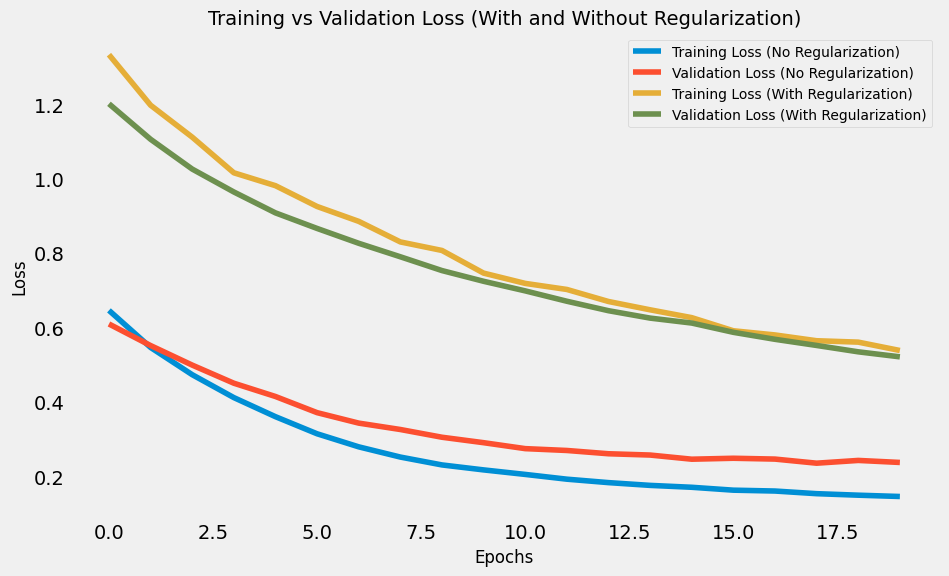

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate classification dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=8,
    n_redundant=2, n_classes=2, random_state=42
)

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Model without regularization
model_without_reg = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_without_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model with L2 regularization
model_with_reg = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(10,)),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_with_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train both models
history_without_reg = model_without_reg.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

history_with_reg = model_with_reg.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

# Plot training vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_without_reg.history['loss'], label='Training Loss (No Regularization)')
plt.plot(history_without_reg.history['val_loss'], label='Validation Loss (No Regularization)')
plt.plot(history_with_reg.history['loss'], label='Training Loss (With Regularization)')
plt.plot(history_with_reg.history['val_loss'], label='Validation Loss (With Regularization)')
plt.title('Training vs Validation Loss (With and Without Regularization)', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.show()


**Interpretation**

### **No Regularization (Blue and Red lines):**
1. **Training Loss (Blue Line):**
   - The training loss decreases steadily and reaches a very low value, indicating that the model is fitting the training data well.
   - However, this suggests that the model might overfit since it focuses heavily on minimizing training loss without accounting for validation performance.

2. **Validation Loss (Red Line):**
   - The validation loss decreases initially but stabilizes after a few epochs. While it doesn’t increase drastically (a sign of severe overfitting), the gap between training and validation loss suggests moderate overfitting.

---

### **With Regularization (Green and Yellow lines):**
1. **Training Loss (Green Line):**
   - The training loss is higher compared to the model without regularization. This is expected because regularization introduces a penalty to prevent overfitting, making the model less focused on perfectly fitting the training data.

2. **Validation Loss (Yellow Line):**
   - The validation loss follows a similar trend to the training loss and is closer to it compared to the no-regularization case. This indicates that regularization helps the model generalize better, reducing overfitting.

---

### **Key Observations:**
1. **Regularization Improves Generalization:**
   - The gap between training and validation loss is smaller for the regularized model, showing better generalization to unseen data.

2. **Trade-off Between Training Performance and Generalization:**
   - The regularized model sacrifices some training performance (higher training loss) to achieve better validation performance and robustness.

3. **Validation Loss Stabilization:**
   - For the regularized model, validation loss stabilizes more smoothly compared to the non-regularized one, indicating a more controlled and robust learning process.

---

### **Conclusion:**
- The **regularized model** is likely the better choice for real-world applications where generalization is critical.
- The **non-regularized model** might work well for training data but risks overfitting and poor performance on unseen data.